In [5]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from Methods.costs import * 
from Methods.least_squares import * 
from Methods.ridge import *
from Methods.cross_validation import *
from Methods.split_data import *
from Methods.scaling_standardization import *
from Methods.build_polynomial import *
from Methods.clearDataset import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from Methods.proj1_helpers import *
DATA_TRAIN_PATH = 'csv/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
tX_tra = tX.T

## Do your thing crazy machine learning thing here :) ...

# Raw Data Analysis 

### Visualisation of the data

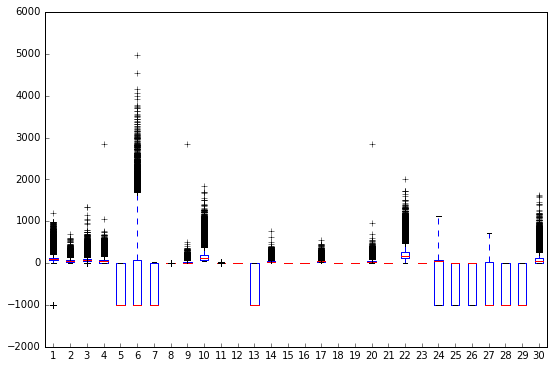

In [3]:
#Boxplot of the Raw Data
boxplot(tX, -2000, 6000, 'boxplot_original')

## Scatter plots

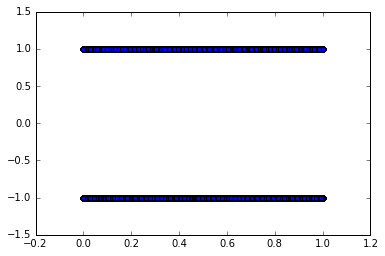

In [4]:
res = np.column_stack((y, tX[:,12])) # Change with tX[:,i] to plot y against the ith col of tX
res_filt = res[res[:,1] != -999]
plt.scatter(res_filt[:,1], res_filt[:,0])
plt.show()

## Correlations (not useful?)

In [5]:
for i,col in zip(range(tX.T.shape[0]),tX.T):
    vec = np.column_stack((y,col))
    #vec_filtered = vec[vec[:,1] > -998]
    print(i, np.corrcoef(vec.T)[0,1])

0 0.239149057892
1 -0.351427955862
2 -0.0140552737849
3 0.192526328569
4 0.141645992566
5 0.191766088075
6 0.140554400465
7 0.0122454812855
8 -0.0152874266878
9 0.153235932476
10 -0.195397896183
11 0.271751877052
12 0.141345988596
13 0.235237975878
14 -0.000943251058212
15 -0.00440253868639
16 -0.0319475868053
17 0.00151623537706
18 0.00412544741152
19 0.0224657515108
20 0.00747534218859
21 0.135520261523
22 0.133549123082
23 0.157604145676
24 0.15046926005
25 0.150468037793
26 0.14071436695
27 0.141264913776
28 0.141255686505
29 0.134295726669


# Feature Processing

## Data scaling 

In [6]:
minima_tX = data_scaling(tX.T)

##### Boxplot of the scale data

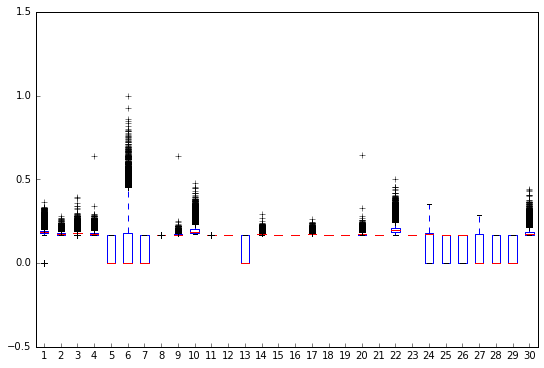

In [7]:
boxplot(minima_tX, -0.5, 1.5, 'boxplot_scaled')

## Data standardization

In [8]:
std_tX = data_standardization(tX.T)

##### Boxplot of the Standardized data

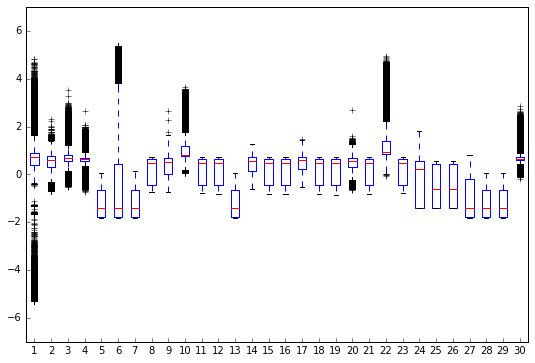

In [9]:
boxplot(std_tX, -7, 7, 'boxplot_standardized')

## Feature Deletion

In [34]:
PERCENT_FACTOR = 0.5
dele_tX_temp = deleteNoneWantedData(tX, PERCENT_FACTOR)
np_dele_tX_temp = np.array(dele_tX_temp)

conc = np.column_stack((y, np_dele_tX_temp))
conc_filtered = conc[~(conc == -999).any(1)]
y_cleaned = conc_filtered[:,0]
tX_cleaned = conc_filtered[:,1:]
#y_tX_temp = np.append(np.array([y]).T, dele_tX_temp, axis=1)
#dele_tX = deleteUnwantedLine(dele_tX_temp)

In [39]:
#dele_tX_temp[:10]
print(y_cleaned.shape)
print(tX_cleaned.shape)

(138096,)
(138096, 23)


## Replace Undefined variables by mean of all the other variables

In [ ]:
mean_tX = averageData(tX)

## Polynomial Transformation

### Polynome

### Squared

In [9]:
tx_squares = build_poly_matrix(tX, 2)

### Sqrt

## Other Transformations

### Log

### Other? 

## Model Selection

### Least Squares

In [10]:
mse, w = least_squares(y, tX)
print(w)
print(mse)

[  8.03911103e-05  -7.20111773e-03  -6.05471144e-03  -5.47536204e-04
  -1.93854515e-02   4.73443447e-04  -2.60377713e-02   3.25108467e-01
  -3.81085734e-05  -2.72787181e+00  -2.21219603e-01   9.50810773e-02
   6.40330195e-02   2.73613146e+00  -3.31801854e-04  -9.54327420e-04
   2.74088821e+00  -5.34165287e-04   9.73498892e-04   3.69225050e-03
   3.54487161e-04  -5.43344617e-04  -3.30448034e-01  -1.40800496e-03
   8.31432873e-04   1.02117271e-03  -1.68047418e-03  -5.83664769e-03
  -1.11088005e-02   2.72833175e+00]
0.339686809915


### Ridge Regression

In [12]:
w_ridge = ridge_regression(y, tX_tra, 1)
print(w_ridge)

[  2.60587944e-04  -9.09041953e-03  -2.05593759e-03  -2.07372712e-03
   4.16112294e-04   5.56555764e-04  -8.63582277e-03   1.49220972e-02
   8.84108509e-05   3.01001515e-03  -1.36439197e-02   2.91963352e-02
   5.90347247e-03   6.34020163e-03  -2.47827750e-04  -1.03790696e-03
   2.15291139e-03  -3.16656538e-04   7.13755800e-04   4.85803562e-03
   3.40155651e-04  -7.69669008e-04  -1.27454270e-02   1.51646839e-03
  -7.80900128e-04  -5.87028123e-04   3.16780195e-04   1.29177964e-03
   3.04952725e-04  -5.48271055e-03]


### Least squares Gradient Descent

### Least squares Stochastique Gradient Descent

### Logistic regression

### Reg logistic regression

## Verification

### Cross Validation

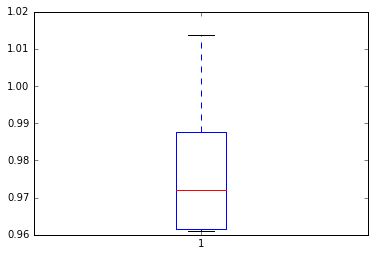

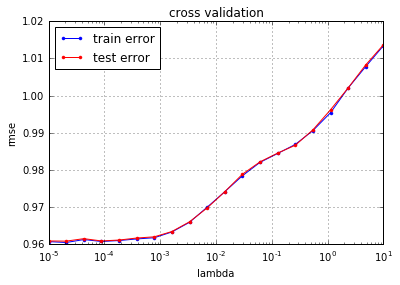

In [10]:
#Data split for the tests
x_tr, y_tr, x_te, y_te = split_data(tX, y, 0.4)

cross_validation_demo(y, tx_squares)


###  Bias-Variance decomposition

### Binary Classification

In [ ]:
#Use predict_labels de project helpers (fait la multiplication entre tX et les w)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'csv/sample-submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)